### Import Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import texthero as hero
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset\spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Dataset Understanding

In [3]:
df.ndim

2

In [4]:
df.shape

(5572, 2)

In [5]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [6]:
df.dtypes

Category    object
Message     object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Missing Values

In [8]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [9]:
df.isnull().any()

Category    False
Message     False
dtype: bool

In [10]:
df.notna().sum()

Category    5572
Message     5572
dtype: int64

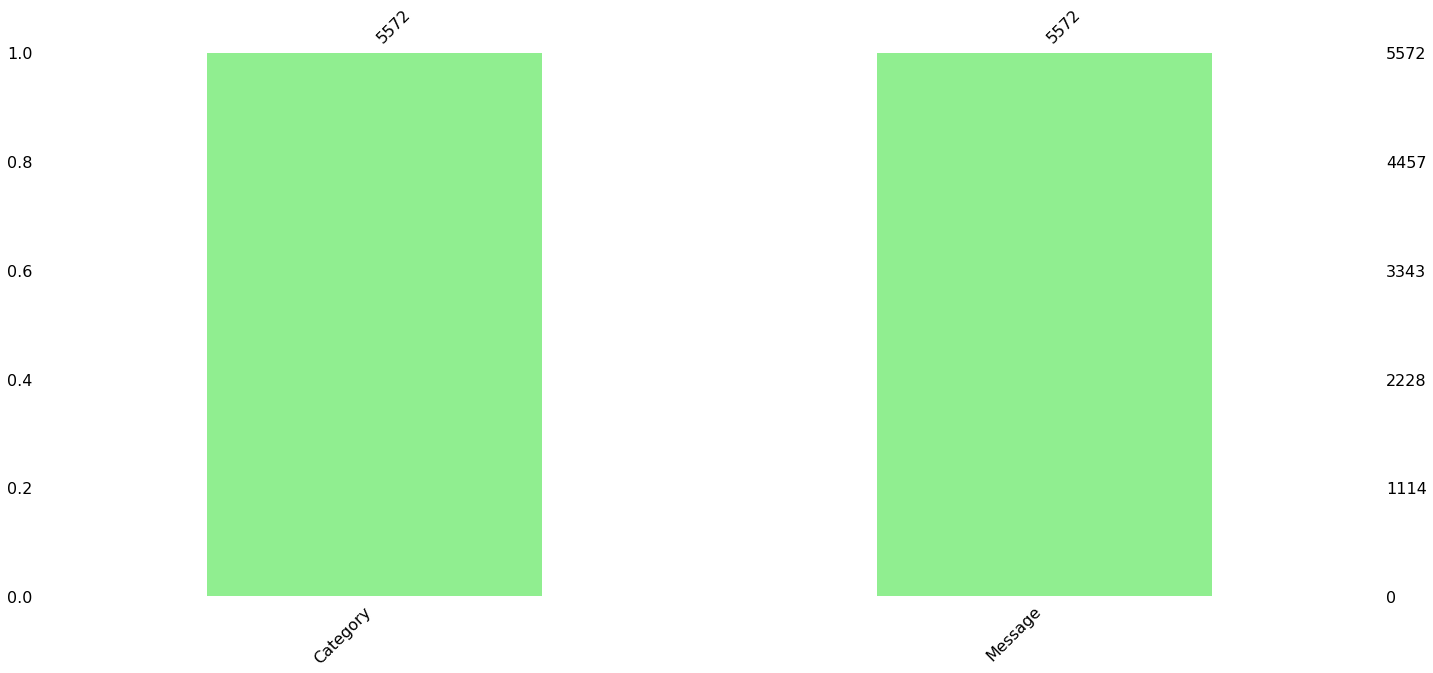

In [11]:
import missingno as msno
msno.bar(df,color='lightgreen')
plt.show()

### Data Visualization

In [12]:
df["Message_Length"] = df["Message"].apply(len)

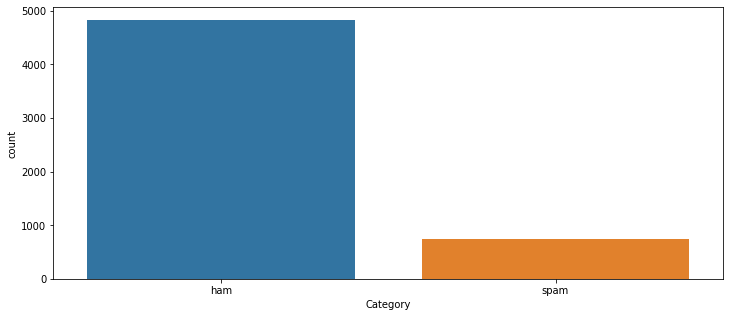

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(df.Category)
plt.show()

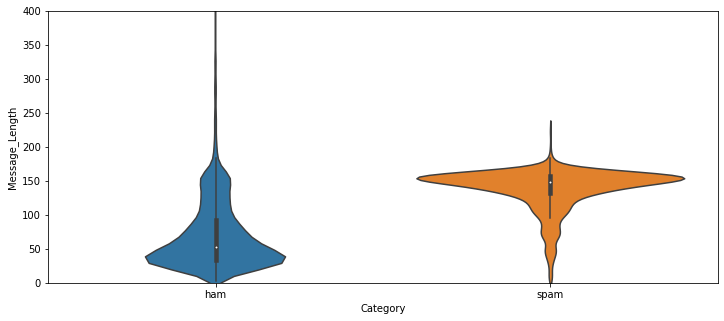

In [14]:
plt.figure(figsize=(12,5))
sns.violinplot(y='Message_Length',x='Category',data=df)
plt.ylim((0,400))
plt.show()

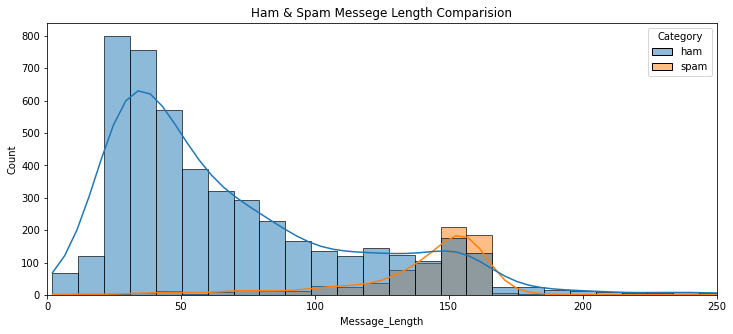

In [15]:
fig=plt.figure(figsize=(12,5))
sns.histplot(
    x=df["Message_Length"],
    hue=df["Category"],kde=True
)
plt.xlim((0,250))
plt.title("Ham & Spam Messege Length Comparision")
plt.show()

In [16]:
df['Message'] = hero.clean(df['Message'])


<center><b>The default pipeline for the clean method is the following:</b></center><br>

|Functions    |Description    |
|----|----|
|fillna(s) | Replace not assigned values with empty spaces.|
|lowercase(s) |Lowercase all text.|
|remove_digits() |Remove all blocks of digits.|
|remove_punctuation() |Remove all string.punctuation (!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~).|
|remove_diacritics() |Remove all accents from strings.|
|remove_stopwords() |Remove all stop words.|
|remove_whitespace() |Remove all white space between words.|

In [17]:
df.head()

,Category,Message,Message_Length
0,ham,go jurong point crazy available bugis n great ...,111
1,ham,ok lar joking wif u oni,29
2,spam,free entry wkly comp win fa cup final tkts 21s...,155
3,ham,u dun say early hor u c already say,49
4,ham,nah think goes usf lives around though,61


### Data Preprocessing

In [18]:
from yellowbrick.target import FeatureCorrelation, BalancedBinningReference, ClassBalance
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
label_encoder = LabelEncoder()

In [19]:
df.Category = label_encoder.fit_transform(df.Category)

In [20]:
label_encoder.classes_

array(['ham', 'spam'], dtype=object)

In [21]:
df.head()

,Category,Message,Message_Length
0,0,go jurong point crazy available bugis n great ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry wkly comp win fa cup final tkts 21s...,155
3,0,u dun say early hor u c already say,49
4,0,nah think goes usf lives around though,61


In [22]:
textFeatures = df['Message'].copy()
vectorizer = TfidfVectorizer("english")
X = vectorizer.fit_transform(textFeatures)
y = df['Category']

In [23]:
X[:5]

<5x8014 sparse matrix of type '<class 'numpy.float64'>'
	with 50 stored elements in Compressed Sparse Row format>

In [24]:
y[:5]

0    0
1    0
2    1
3    0
4    0
Name: Category, dtype: int32

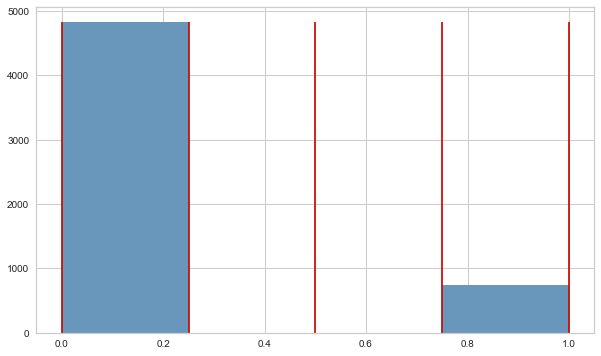

In [25]:
plt.figure(figsize=(10,6))
visualizer = BalancedBinningReference()
visualizer.fit(y)      
plt.show()

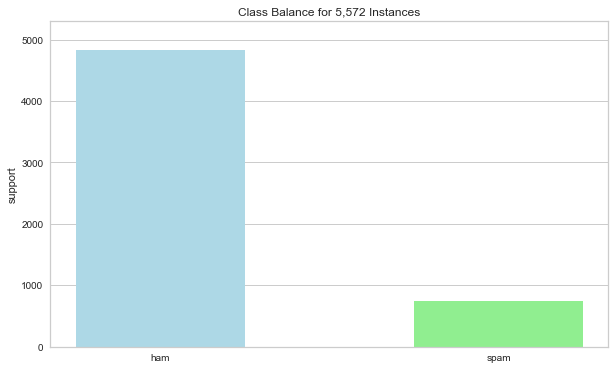

In [26]:
classes = label_encoder.classes_
plt.figure(figsize=(10,6))
viz = ClassBalance(labels=classes,colors=['lightblue','lightgreen'])
viz.fit(y)
viz.show()
plt.show()

**Sampling Imbalanced Data**

In [27]:
from imblearn import combine
sme = combine.SMOTEENN(random_state = 14)
X, y = sme.fit_resample(X, y)

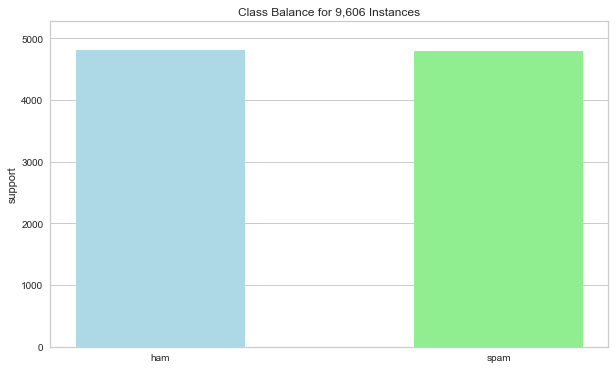

In [28]:
classes = label_encoder.classes_
plt.figure(figsize=(10,6))
viz = ClassBalance(labels=classes,colors=['lightblue','lightgreen'])
viz.fit(y)
viz.show()
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

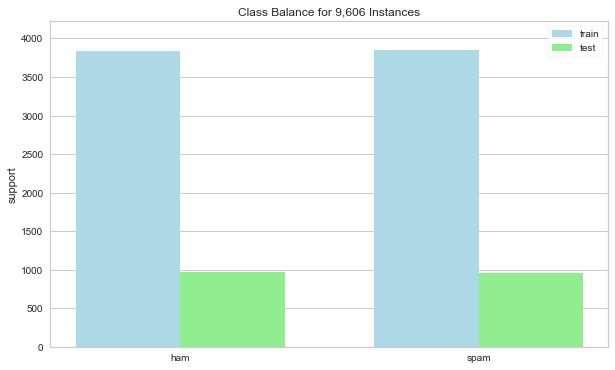

In [30]:
plt.figure(figsize=(10,6))
viz = ClassBalance(labels=classes,colors=['lightblue','lightgreen'])
viz.fit(y_train, y_test)
viz.show()
plt.show()

### Navies Bayes Classifier

In [31]:
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from yellowbrick.classifier import class_prediction_error

In [32]:
from sklearn.naive_bayes import MultinomialNB
mnb_clf = MultinomialNB(alpha=0.1)

In [33]:
mnb_clf.fit(X_train,y_train)

MultinomialNB(alpha=0.1)

In [34]:
y_pred = mnb_clf.predict(X_test)

**Classification Accuracy:**

In [35]:
print(accuracy_score(y_test, y_pred))

0.9906347554630593


**Classification Error:**

In [36]:
print(1 - accuracy_score(y_test, y_pred))

0.009365244536940653


**Sensitivity/True Positive Rate/Recall Score**

In [37]:
print(recall_score(y_test, y_pred))

0.9978991596638656


**Precision Score:**

In [38]:
print(precision_score(y_test, y_pred))

0.9834368530020704


**F1 Score**

In [39]:
print(f1_score(y_test, y_pred))

0.9906152241918664


**Class Prediction Error**

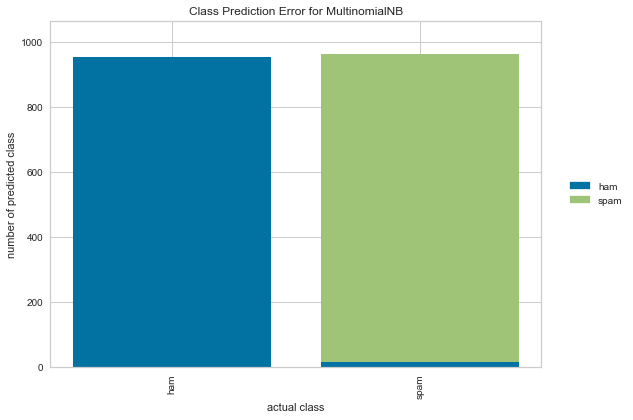

In [40]:
plt.figure(figsize=(10,6))
visualizer = class_prediction_error(mnb_clf,X_train,y_train,X_test,y_test,classes=classes)
visualizer.show()
plt.show()

**ROC Curve**

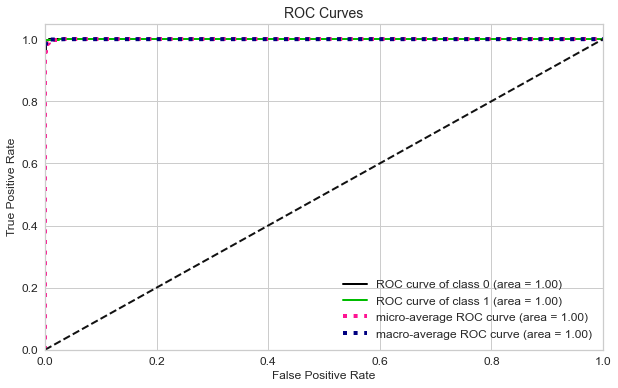

In [41]:
y_probas = mnb_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

**Precision Recall Curve**

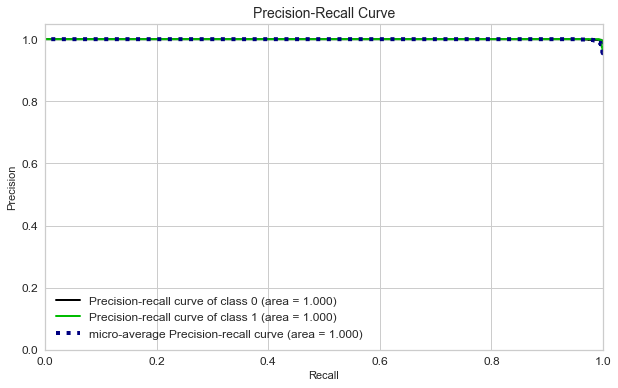

In [42]:
skplt.metrics.plot_precision_recall(y_test, y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

**Learning Curve**

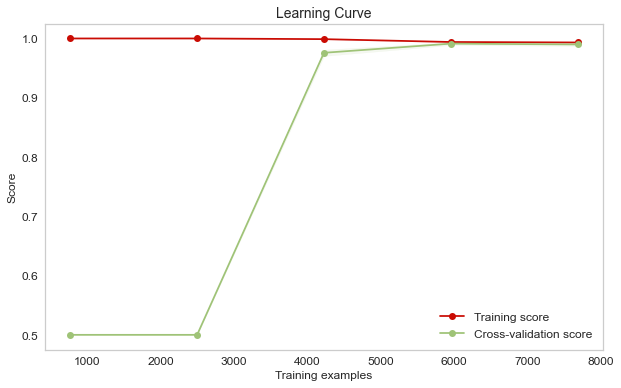

In [43]:
skplt.estimators.plot_learning_curve(mnb_clf, X, y,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

**Lift Curve**

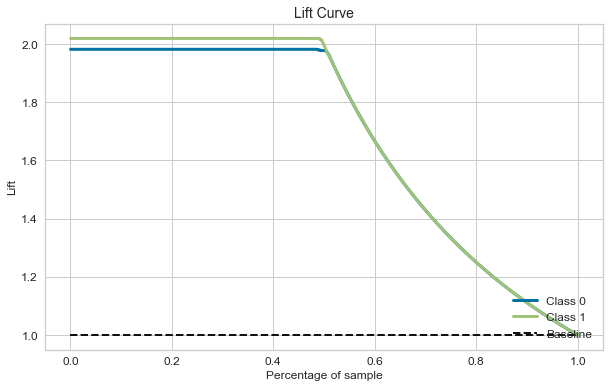

In [44]:
skplt.metrics.plot_lift_curve(y_test, y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

**Cumulative Gains Curve**

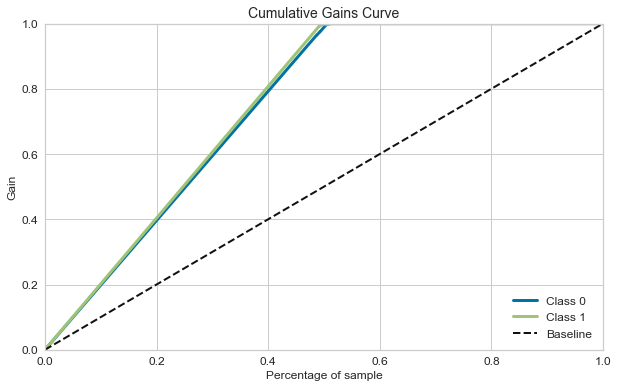

In [45]:
skplt.metrics.plot_cumulative_gain(y_test, y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

**Confusion Matrix**

In [46]:
confusion_matrix(y_test, y_pred)

array([[954,  16],
       [  2, 950]], dtype=int64)

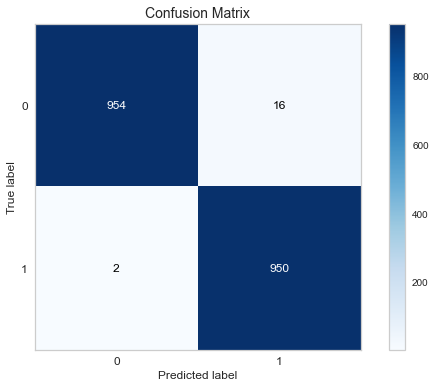

In [47]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

**Classification Report**

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       970
           1       0.98      1.00      0.99       952

    accuracy                           0.99      1922
   macro avg       0.99      0.99      0.99      1922
weighted avg       0.99      0.99      0.99      1922



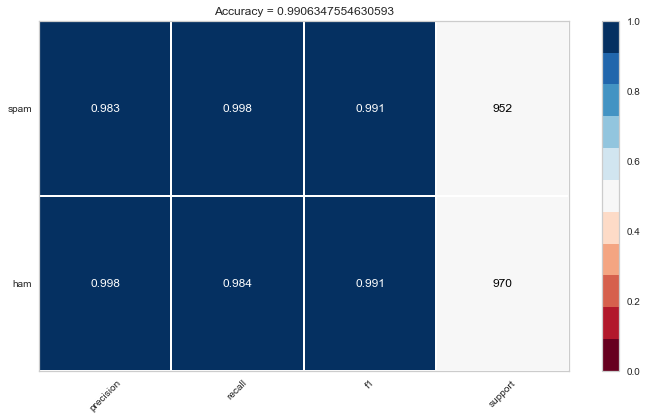

In [49]:
import yellowbrick as yb
plt.figure(figsize=(10,6))
visualizer = yb.classifier.classification_report(
    mnb_clf, X_train, y_train, X_test, y_test, classes=classes, support=True,cmap='RdBu',
    title = 'Accuracy = ' + str(accuracy_score(y_test,y_pred))
)
plt.show()